In [2]:
#importing packages for data manuplation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for easy access to path
import sys
import os

In [3]:
sys.path.append(os.path.abspath(os.path.join('data')))
sys.path.insert(0,'../scripts_/')

In [4]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../data/AdSmartABdata.csv')
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [5]:
df.columns

Index(['auction_id', 'experiment', 'date', 'hour', 'device_make',
       'platform_os', 'browser', 'yes', 'no'],
      dtype='object')

In [6]:
df.shape

(8077, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [8]:
from data_cleaning import DataCleaning 

In [9]:
#creating an object
data=DataCleaning(df)

In [10]:
#check if the data has null values
data.percent_missing(df)
df.head()

The Telecom dataset contains 0.0 % missing values.


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


>Our dataset has no missing value and ready for further exploration.

In [11]:
from data_cleaning import DataCleaning 
data=DataCleaning(df)

In [28]:
#check if it have duplicate user id
data.unique_users(df)
df.head()

The data has 0 repeated users.


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


>All the Auction Id are unique:No duplicate data found

In [35]:
aggregat_contorl = df.groupby('experiment').agg({'auction_id': 'count'})['auction_id']['control']
aggregat_exposed  = df.groupby('experiment').agg({'auction_id': 'count'})['auction_id']['exposed']

print(f"users that belong to control group is {aggregat_contorl}")
print(f"users that belong to exposed group is {aggregat_exposed}")

users that belong to control group is 4071
users that belong to exposed group is 4006


>4071 users from the experiment are control group while,4006 are from the belong to exposed group

* if both section of yes and no is 0, then the users didn't answered
* let us filter out those who answered either yes or no

In [16]:
answered = df.query('yes==1 or no==1')
print(f"There are {answered.shape[0]} rows and {answered.shape[1]} columns")

There are 1243 rows and 9 columns


* plots of people who answered yes or no

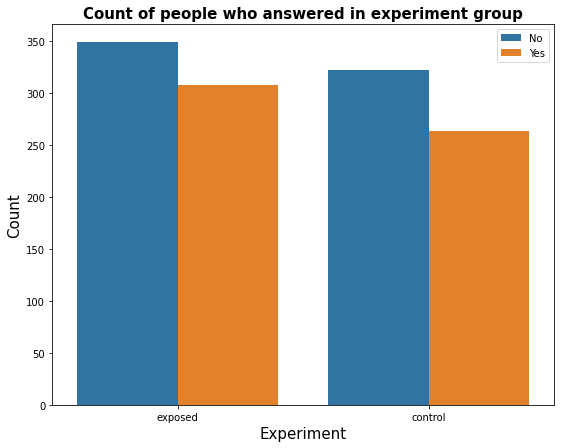

In [17]:
plt.figure(figsize=(9,7))
ax=sns.countplot(x ='experiment', hue='yes', data = answered) 

ax.set_xlabel('Experiment', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Count of people who answered in experiment group', fontsize=15, fontweight='bold')
plt.legend( ['No', 'Yes'])

* PLOT OF USED BROWSERS

Text(0.5, 1.0, 'Used Browsers')

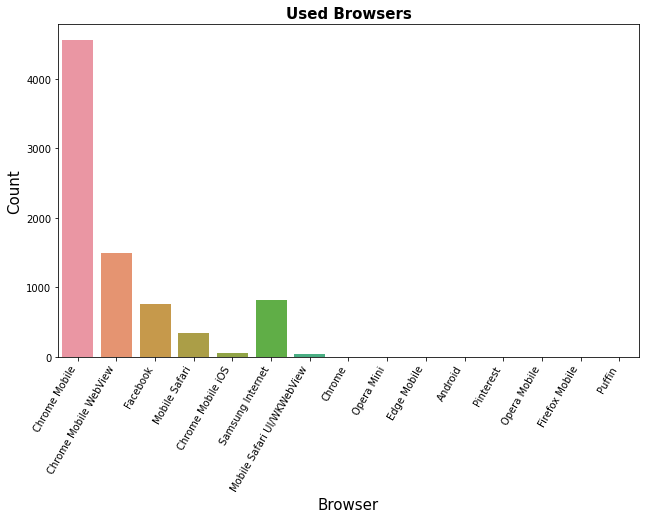

In [18]:
plt.figure(figsize=(9,7))
ax= sns.countplot(x ='browser', data = df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
ax.set_xlabel('Browser', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Used Browsers', fontsize=15, fontweight='bold')

* PLOT FOR DATE

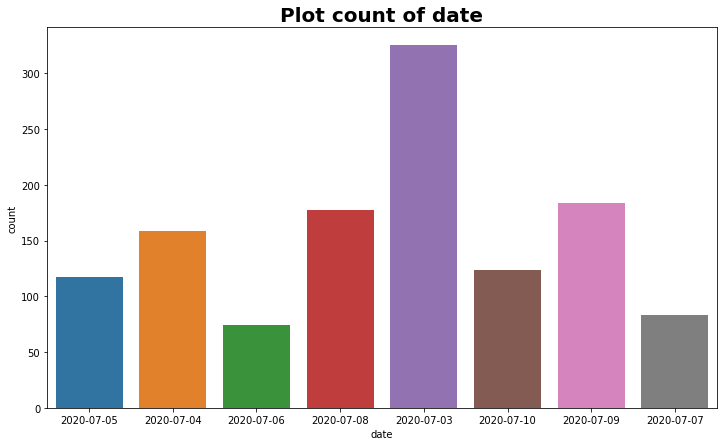

In [19]:
def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Plot count of {column}', size=20, fontweight='bold')
    
plot_count(answered, 'date')